In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
winedata=pd.read_csv('/content/drive/MyDrive/DONA_DSML_LAB/Wine_Quality.csv')

In [ ]:
winedata.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
winedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
winedata.isnull().sum()

,0
type,0
fixed acidity,10
volatile acidity,8
citric acid,3
residual sugar,2
chlorides,2
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,9


In [ ]:
winedata.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [ ]:
winedata.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
winedata['type']=LabelEncoder().fit_transform(winedata['type'])
winedata.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
for column in winedata.columns:
  if pd.api.types.is_numeric_dtype(winedata[column]):
    winedata[column]=winedata[column].fillna(winedata[column].mean())
  else:
    winedata[column]=winedata[column].fillna(winedata[column].mode()[0])

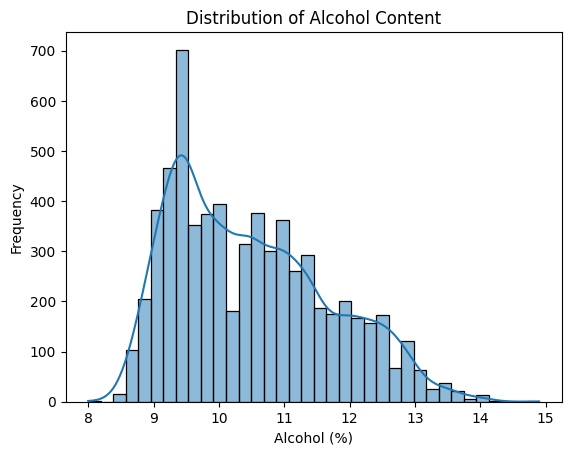

In [ ]:

sns.histplot(winedata['alcohol'], kde=True)
plt.title('Distribution of Alcohol Content')
plt.xlabel('Alcohol (%)')
plt.ylabel('Frequency')
plt.show()


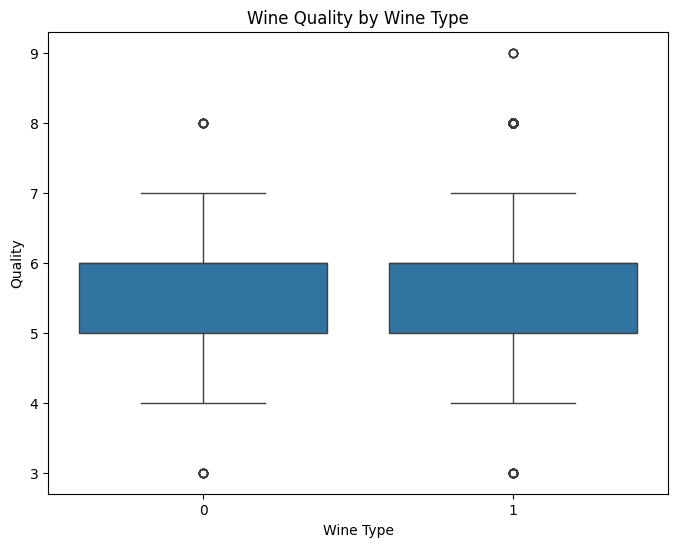

In [ ]:
plt.figure(figsize=(8, 6))  # Adjust figure size if neededplt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='quality', data=winedata)
plt.title('Wine Quality by Wine Type')
plt.xlabel('Wine Type')
plt.ylabel('Quality')
plt.show()

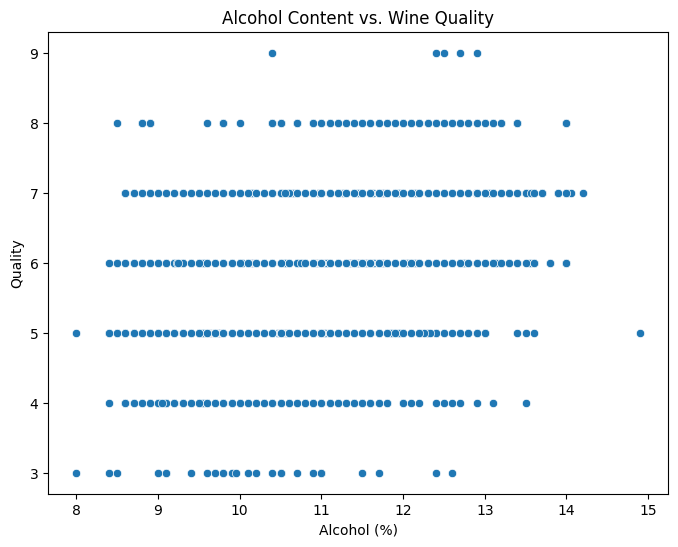

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='alcohol', y='quality', data=winedata)
plt.title('Alcohol Content vs. Wine Quality')
plt.xlabel('Alcohol (%)')
plt.ylabel('Quality')
plt.show()

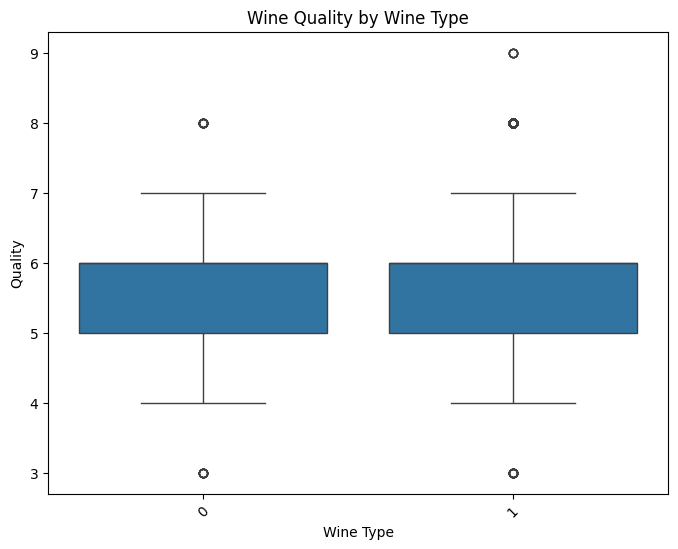

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='quality', data=winedata)
plt.title('Wine Quality by Wine Type')
plt.xlabel('Wine Type')
plt.ylabel('Quality')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

In [ ]:
X = winedata.drop('quality',axis=1)
y = winedata['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred=regr.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
print(mse)
print(regr.coef_)
print(regr.intercept_)
print(r2_score(y_test,y_pred))

0.47142125991978623
[-3.41465792e-01  7.87101728e-02 -1.47184596e+00 -4.10628390e-02
  6.07094439e-02 -6.70234962e-01  5.27960941e-03 -1.64982333e-03
 -9.56364968e+01  4.40108968e-01  7.34056038e-01  2.27705826e-01]
96.68943584121307
0.34048454089868496


In [ ]:
for i in range(len(X.columns)):
  print(y_pred[i],y_test.iloc[i])

6.349929265319446 7
6.02349545818133 7
5.768278221783305 6
5.4638186622626534 6
5.731482551580541 5
6.24868770120699 7
5.736397617874829 6
5.026133628792607 5
5.485799277028661 5
5.869325154340473 6
5.562637630338813 5
6.310697353668047 6


In [ ]:
user_input=['white',7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8]
user_input[0]=0 if user_input[0]=='red' else 1
prediction = regr.predict([user_input])
print(f"Predicted quality: {prediction[0]:.2f}")

Predicted quality: 5.59


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
